In [13]:
using Statistics, StatsBase, Random
using SparseArrays, JLD


In [16]:
function build_consumption_matrix(nd, nb)

    if nd == 1
        CM = convert(Array{Bool}, ones(nd, nb) .== 1)
    else 
        CMone = specialists_matrix(nd)
        CMtwo = generalists_matrix(nd, nb)
        CM = convert(Array{Bool}, hcat(CMone,CMtwo) .== 1)
    end
    
    return CM

end
 

#TODO - these only work if mod(nb/2) == 0
function specialists_matrix(nd)
 
    CMone = zeros(nd, nd)
    for j = 1:nd
        CMone[j,j] = 1
    end

    return CMone

end


function generalists_matrix(nd, nb)

    # Method 1: assign num substrates first. 
    # nupr = n substrates consumed by each consumer 
    xhigh, xlow = log10(nd), log10(1)
    nupr = 10 .^ ((rand((nb-nd)).-0.5).*(xhigh-xlow).+mean([xhigh xlow]))
    nupr = round.(Int,nupr) #round to integers:
    wv = StatsBase.ProbabilityWeights([1/nd:1/nd:1;])
    food = [sample(1:nd,wv,nupr[j], replace = false) for j=1:(nb-nd)]

    CMtwo = zeros(nd,(nb-nd))
    for j = 1:(nb-nd)
        CMtwo[food[j],j] .= 1
    end

    return CMtwo

end


generalists_matrix (generic function with 1 method)

In [17]:
CM = build_consumption_matrix(10, 40)

10×40 Matrix{Bool}:
 1  0  0  0  0  0  0  0  0  0  0  0  0  …  1  1  0  0  1  0  0  1  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0     0  1  0  0  1  0  1  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     1  1  1  0  0  0  1  0  0  0  1  0
 0  0  0  1  0  0  0  0  0  0  0  0  1     1  1  1  0  1  0  1  0  1  0  1  0
 0  0  0  0  1  0  0  0  0  0  0  0  0     1  1  1  1  1  0  1  1  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  1  0  0  …  0  1  0  0  1  0  1  0  0  0  1  0
 0  0  0  0  0  0  1  0  0  0  0  0  1     1  1  1  1  1  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  0  1  1     1  1  0  1  1  0  1  1  1  0  1  1
 0  0  0  0  0  0  0  0  1  0  0  0  0     1  1  1  0  1  0  1  0  0  1  1  0
 0  0  0  0  0  0  0  0  0  1  0  0  0     1  1  1  1  1  1  1  0  0  0  0  1

In [18]:
macro showall(expr) 
  quote 
      show(IOContext(stdout, :limit => false), "text/plain",$(esc(expr)))
  end
end 

@showall (macro with 1 method)

In [19]:
@showall CM

10×40 Matrix{Bool}:
 1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  1  0  0  1  0  0  1  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0  1  0  0  1  0  1  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  1  0  1  0  0  1  1  1  0  0  0  1  0  0  0  1  0
 0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  1  0  0  1  1  0  0  1  0  1  1  1  0  1  0  1  0  1  0  1  0
 0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  1  0  0  1  0  1  1  1  0  0  1  0  0  1  1  1  1  1  0  1  1  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  1  0  0  1  0  1  1  0  1  0  1  0  0  0  0  1  1  1  0  1  0  0  1  0  1  0  0  0  1  0
 0  0  0  0  0  0  1  0  0  0  0  0  1  1  1  1  1  0  1  1  1  1  1  1  1  1  0  0  1  1  1  1  1  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  0  1  1  0  0  1  1  1  1  1  1  1  0  1  0  1  0  0  1  1  0  1  1  0  1  1  1  0  1  1
 0  0  0  0  0  0  0

In [1]:
function build_grazing_matrix(nb, np, nz)

    GrM = collect(gmatrix(nb, np, nz))

    return GrM
end


function gmatrix(nb, np, nz)
 
    GM = sprand(Bool, nz, (nb+np), 0.3)
    GrM = check_for_empty_cols(GM, nz)

    return GrM

end

function check_for_empty_cols(M, n)

    empty_cols = findall(x -> x == 0, sum(M, dims=1))
    s = size(empty_cols)

    if s[1] > 0
        for i in 1:s[1]
            new_col = sprand(Bool, n, 1, 0.5)
            M[:, empty_cols[i][2]] = new_col
        end
        M = check_for_empty_cols(M)
    end

    return M

end

check_for_empty_cols (generic function with 1 method)

In [51]:
GrM = build_grazing_matrix(20, 40, 8)

8×60 Matrix{Bool}:
 0  1  0  1  0  0  0  0  0  0  1  0  0  …  0  0  0  0  1  1  0  1  0  0  0  0
 0  0  1  0  1  1  0  0  0  0  0  0  1     1  0  0  0  0  0  0  1  0  1  0  0
 1  0  0  1  1  1  1  0  0  1  0  0  0     0  0  0  0  0  0  0  1  1  0  0  0
 0  1  0  0  0  0  0  1  0  1  1  0  0     0  1  1  1  0  0  1  0  0  0  1  0
 0  1  0  0  1  0  0  1  0  0  1  1  0     0  1  0  0  0  1  0  1  0  1  1  0
 0  0  1  1  1  0  0  1  1  0  0  0  0  …  1  0  1  0  0  0  1  0  1  1  0  1
 0  1  0  1  0  0  1  1  0  0  0  0  1     1  0  1  0  0  0  0  0  1  1  0  0
 0  1  0  0  1  0  0  0  0  0  0  0  1     1  0  0  0  0  1  0  0  0  0  0  0

In [52]:
@showall GrM

8×60 Matrix{Bool}:
 0  1  0  1  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  1  0  1  0  0  0  0  1  1  0  0  0  0  1  0  0  0  0  0  1  1  0  0  0  0  0  1  0  0  0  0  0  1  1  0  1  0  0  0  0
 0  0  1  0  1  1  0  0  0  0  0  0  1  1  0  1  0  1  0  1  0  0  0  0  0  1  1  1  0  0  0  0  0  0  0  0  1  1  0  1  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  1  0  1  0  0
 1  0  0  1  1  1  1  0  0  1  0  0  0  0  0  0  1  0  0  1  1  0  1  1  0  1  0  0  1  1  0  1  0  0  0  0  0  1  0  1  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  1  1  0  0  0
 0  1  0  0  0  0  0  1  0  1  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  1  0  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  1  1  1  0  0  1  0  0  0  1  0
 0  1  0  0  1  0  0  1  0  0  1  1  0  0  1  0  0  1  1  0  0  0  0  1  0  1  1  1  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0  0  0  1  0  1  0  1  0  0  0  1  0  1  0  1  1  0
 0  0  1  1  1  0  0  1  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0 

In [23]:
(0.171102517899136+ 0.59857069218143547+ 1.928166469876407+ 5.391054155817703)/4

2.0222234589436705

In [49]:
using NCDatasets

In [50]:
ds1 = NCDataset("/home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/out_30y_20230704_0110.nc")
ds2 = NCDataset("/home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/out_30y_20230704_0212.nc")
ds3 = NCDataset("/home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/out_30y_20230704_0228.nc")
ds4 = NCDataset("/home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/out_30y_20230704_0320.nc")

Dataset: /home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/out_30y_20230704_0320.nc
Group: /

Dimensions
   np = 6
   nb = 10
   nz = 3
   nn = 1
   nd = 4
   ndepth = 89
   ndepth1 = 90
   nrec = 219601
   nprey = 16

Variables
  p   (89 × 6 × 219601)
    Datatype:    Float64 (Float64)
    Dimensions:  ndepth × np × nrec
    Attributes:
     units                = mmol/m3 C biomass

  b   (89 × 10 × 219601)
    Datatype:    Float64 (Float64)
    Dimensions:  ndepth × nb × nrec
    Attributes:
     units                = mmol/m3 C biomass

  z   (89 × 3 × 219601)
    Datatype:    Float64 (Float64)
    Dimensions:  ndepth × nz × nrec
    Attributes:
     units                = mmol/m3 C biomass

  n   (89 × 1 × 219601)
    Datatype:    Float64 (Float64)
    Dimensions:  ndepth × nn × nrec
    Attributes:
     units                = mmol/m3 C OM

  d   (89 × 4 × 219601)
    Datatype:    Float64 (Float64)
    Dimensions:  ndepth × nd × nrec
    Attributes:
     units                

In [51]:

function get_endpoints(ds, vars)

    out = Vector{Any}()

    for v in vars
        append!(out, [ds["$v"][:,:,end]])
    end

    return out[1], out[2], out[3]

end

get_endpoints (generic function with 1 method)

In [52]:
using Plots, ColorSchemes

function mld_temp_plots(ds1, ds2, ds3, ds4)


    p1, z1, b1 = get_endpoints(ds1, ["p", "z", "b"])
    p2, z2, b2 = get_endpoints(ds2, ["p", "z", "b"])
    p3, z3, b3 = get_endpoints(ds3, ["p", "z", "b"])
    p4, z4, b4 = get_endpoints(ds4, ["p", "z", "b"])

    H = ds1["H"][:]
    dz = ds1["dz"][:]
    zc = [dz/2:dz:(H-dz/2)]
    
    f1 = plot_stacked_bio(p1, b1, z1, zc)
    f2 = plot_stacked_bio(p2, b2, z2, zc)
    f3 = plot_stacked_bio(p3, b3, z3, zc)
    f4 = plot_stacked_bio(p4, b4, z4, zc, 1)

    fig = plot(f1, f2, f3, f4,
        layout = [1 1 1 1],
        size=(700,1000),
        # xlabel = "Conc. (mmol N/m3)",
        # ylabel = "Depth (m)"
    )

    # savefig(f1,"results/plots/individual/$(file)_$(season)_$(years)y.pdf")
    # savefig(f2,"results/plots/total/$(file)_$(season)_$(years)y.pdf")
    # savefig(fig,"results/plots/combined/$(file)_$(season)_$(years)y.pdf")

    # savefig(f1,"results/plots/individual/$(file)_$(season)30m_$(years)y2.png")
    # savefig(f2,"results/plots/total/$(file)_$(season)30m_$(years)y2.png")
    # savefig(fig,"results/plots/combined/$(file)_$(season)30m_$(years)y2.png")

end


function plot_stacked_bio(p, b, z, zc, type=0)

    if type == 0
        p1 = plot(sum(p, dims = 2), -zc, lc="green",lw=3, grid=false, xrotation=45, label="", xlimits=(0,4))
        plot!(sum(b, dims = 2), -zc, lw=3,lc="blue", label="", xlimits=(0,4)) 
        plot!(sum(z, dims = 2), -zc, lw=3,lc="black", label="", xlimits=(0,4)) 
    else
        p1 = plot(sum(p, dims = 2), -zc,lw=3, lc="green", grid=false, xrotation=45, label="Total P", xlimits=(0,4))
        plot!(sum(b, dims = 2), -zc, lw=3,lc="blue", label="Total B", xlimits=(0,4)) 
        plot!(sum(z, dims = 2), -zc,lw=3, lc="black", label="Total Z", xlimits=(0,4)) 
    end

    f1 = plot(p1,
        linewidth = 2,
        size=(300,200),
        fg_legend = :transparent,
    )

    return f1
end

plot_stacked_bio (generic function with 2 methods)

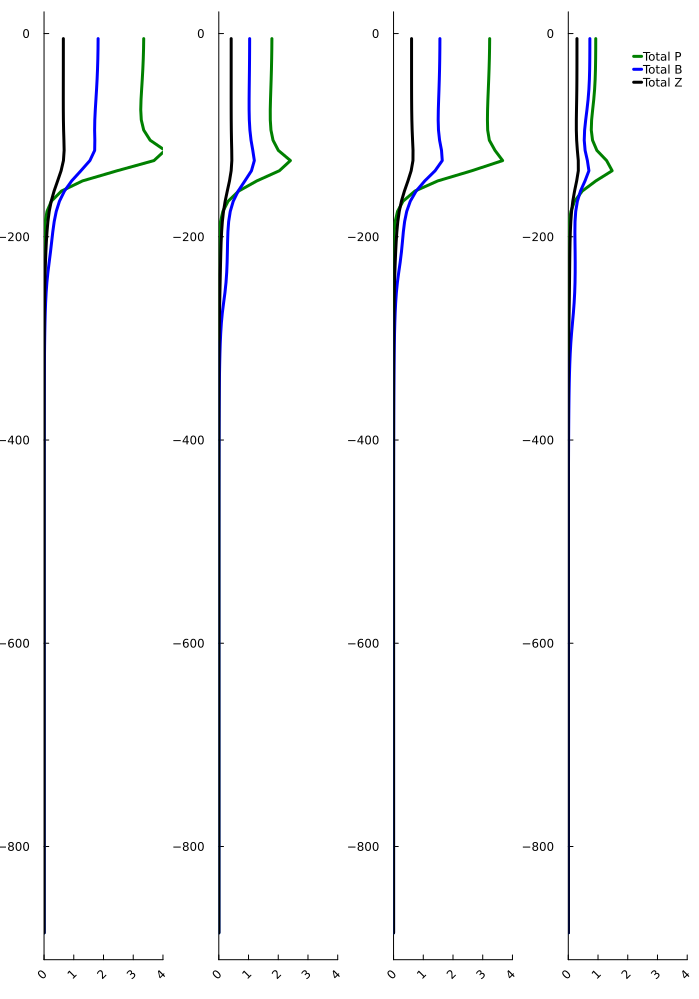

In [53]:
mld_temp_plots(ds1, ds2, ds3, ds4)